Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [15]:
NAME = "Viktoriia Stepanenko"
COLLABORATORS = "--------------"

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [16]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): #selects a median out of three potential answers by comparing them
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst): #performs the actual quicksort
    indices = [(0, len(lst))] #create the list of the target length for the indices of the original list

    while indices:
        (frm, to) = indices.pop() #filling out the list with the indices from the given start to the given end
        if frm == to:
            continue

        # Find the partition:
        N = to - frm #establish the length
        inds = [frm + int(N * n) for n in locations] #fill out with target indices
        values = [lst[ind] for ind in inds] 
        partition = median(*values) #find the partition through medians

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the list of smaller elements (than the median)
        upper = [a for a in lst[frm:to] if a > partition] #the list of larger elements
        counts = sum([1 for a in lst[frm:to] if a == partition]) #establish the full length of the list

        ind1 = frm + len(lower) #determine the end index of the list of smaller values
        ind2 = ind1 + counts #determine the end index of the list of larger values

        # Push back into correct place:
        lst[frm:ind1] = lower #establish all three lists as needed in the quicksort using indices
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #fill out our lists with target indices in the right order
        indices.append((ind2, to))
    return lst #return sorted list


def randomized_quicksort(): #randomized quicksort, as the name suggests
    lst = [i for i in range(N)] #take the input
    random.shuffle(lst) #randomize (shuffle in place) the input
    return qsort(lst) #then apply quicksort to the randomized input


def test_quicksort(): #test whether the algorithm works
    lst = randomized_quicksort() 
    assert (lst == [i for i in range(N)]) #if True, and an algorithm worked, then don't raise an error


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.07495689699862851


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The fact that our function still permutes the input in place before applying quicksort, while Cormen et al. reading was suggesting not doing that and focusing instead on picking random number as a pivot. Also, reading's suggestion is much more straightforward and saves more space, since almost every change (except for exchanging the pivot with another element) happens in place, while our code utilizes an extra function and a ton of lists and variables.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

Text(0.5, 0, 'list lengths')

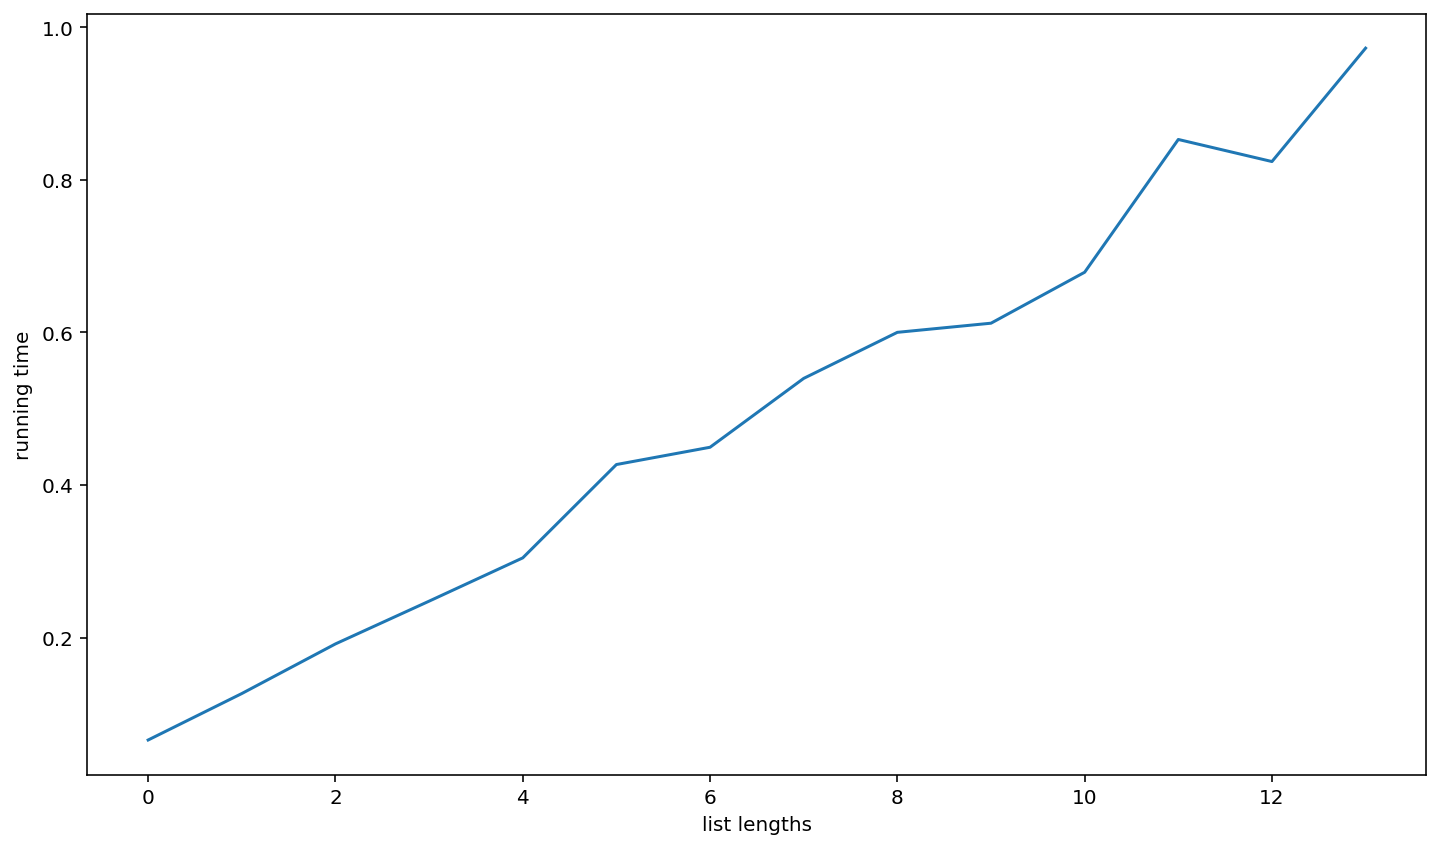

In [18]:
#I've tested the code and it works, but it takes quite an amount of time to run for the large inputs (initially I've put a few hundreds). The trend is clear and is the same for any input

import matplotlib.pyplot as plt

timing=[] #create a new list for timing corresponding to each list length
for i in range(1, 15): #from 1 to first (smth) consecutive positive integers. 15 is just so I can rerun the code and upload it to the gist
    a=(float(timeit.timeit(randomized_quicksort, number=i))+float(timeit.timeit(randomized_quicksort, number=i))+float(timeit.timeit(randomized_quicksort, number=i)))/3 #capture the runtime for each of the lists and average their values out; although I could average it out even more
    timing.append(a) #record the runtime for each of the lists

plt.plot(timing)
plt.ylabel('running time')
plt.xlabel('list lengths')

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [12]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): #selects a median out of three potential answers by comparing them
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1


def qsort(lst): #performs the actual quicksort
    indices = [(0, len(lst))] #create the list of the target length for the indices of the original list

    while indices:
        (frm, to) = indices.pop() #filling out the list with the indices from the given start to the given end
        if frm == to:
            continue

        # Find the partition:
        N = to - frm #establish the length
        inds = [frm + int(N * n) for n in locations] #fill out with target indices
        values = [lst[ind] for ind in inds] 
        partition = median(*values) #find the partition through medians

        # Split into lists:
        lower = [a for a in lst[frm:to] if a <= partition] #the list of smaller elements (than the median)
        upper = [a for a in lst[frm:to] if a >= partition] #the list of larger elements

        ind1 = frm + len(lower) #determine the end index of the list of smaller values
        ind2 = ind1 + len(upper) #determine the end index of the list of larger values

        # Push back into correct place:
        lst[frm:ind1] = lower #establish all three lists as needed in the quicksort using indices
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #fill out our lists with target indices in the right order
        indices.append((ind2, to))
    return lst #return sorted list


#unsure of both if I understood the task and implemented the right thing, since I made some mistake and my kernel is not cooperating :/ Would be thankful for the clarification

In [6]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [19]:
#The kernel is not cooperating, but - I would simply create an extra list that would be filled with timings of this algorithm and then create a plot for that and merge the two

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [20]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def qsort(lst): #performs the actual quicksort
    indices = [(0, len(lst))] #create the list of the target length for the indices of the original list

    while indices:
        (frm, to) = indices.pop() #filling out the list with the indices from the given start to the given end
        if frm == to:
            continue

        # Find the partition:
        N = to - frm #establish the length
        inds = [frm + int(N * n) for n in locations] #fill out with target indices
        values = [lst[ind] for ind in inds] 
        partition = values[0] #MODIFIED HERE
        
        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the list of smaller elements (than the median)
        upper = [a for a in lst[frm:to] if a > partition] #the list of larger elements
        counts = sum([1 for a in lst[frm:to] if a == partition]) #establish the full length of the list

        ind1 = frm + len(lower) #determine the end index of the list of smaller values
        ind2 = ind1 + counts #determine the end index of the list of larger values

        # Push back into correct place:
        lst[frm:ind1] = lower #establish all three lists as needed in the quicksort using indices
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #fill out our lists with target indices in the right order
        indices.append((ind2, to))
    return lst #return sorted list

In [21]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [22]:
#ORIGINAL

import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): #selects a median out of three potential answers by comparing them
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def firstqsort(lst): #performs the actual quicksort
    indices = [(0, len(lst))] #create the list of the target length for the indices of the original list

    while indices:
        (frm, to) = indices.pop() #filling out the list with the indices from the given start to the given end
        if frm == to:
            continue

        # Find the partition:
        N = to - frm #establish the length
        inds = [frm + int(N * n) for n in locations] #fill out with target indices
        values = [lst[ind] for ind in inds] 
        partition = median(*values) #find the partition through medians

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the list of smaller elements (than the median)
        upper = [a for a in lst[frm:to] if a > partition] #the list of larger elements
        counts = sum([1 for a in lst[frm:to] if a == partition]) #establish the full length of the list

        ind1 = frm + len(lower) #determine the end index of the list of smaller values
        ind2 = ind1 + counts #determine the end index of the list of larger values

        # Push back into correct place:
        lst[frm:ind1] = lower #establish all three lists as needed in the quicksort using indices
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #fill out our lists with target indices in the right order
        indices.append((ind2, to))
    return lst #return sorted list


def firstrandomized_quicksort(): #randomized quicksort, as the name suggests
    lst = [i for i in range(N)] #take the input
    random.shuffle(lst) #randomize (shuffle in place) the input
    return firstqsort(lst) #then apply quicksort to the randomized input

In [26]:
#MY NEW VERSION

import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def secondqsort(lst): #performs the actual quicksort
    indices = [(0, len(lst))] #create the list of the target length for the indices of the original list

    while indices:
        (frm, to) = indices.pop() #filling out the list with the indices from the given start to the given end
        if frm == to:
            continue

        # Find the partition:
        N = to - frm #establish the length
        inds = [frm + int(N * n) for n in locations] #fill out with target indices
        values = [lst[ind] for ind in inds] 
        partition = values[0] #MODIFIED HERE
        
        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the list of smaller elements (than the median)
        upper = [a for a in lst[frm:to] if a > partition] #the list of larger elements
        counts = sum([1 for a in lst[frm:to] if a == partition]) #establish the full length of the list

        ind1 = frm + len(lower) #determine the end index of the list of smaller values
        ind2 = ind1 + counts #determine the end index of the list of larger values

        # Push back into correct place:
        lst[frm:ind1] = lower #establish all three lists as needed in the quicksort using indices
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #fill out our lists with target indices in the right order
        indices.append((ind2, to))
    return lst #return sorted list


def secondrandomized_quicksort(): #randomized quicksort, as the name suggests
    lst = [i for i in range(N)] #take the input
    random.shuffle(lst) #randomize (shuffle in place) the input
    return secondqsort(lst) #then apply quicksort to the randomized input

In [28]:
#I've tested the code and it works, but it takes quite an amount of time to run for the large inputs. The trend here is clear

import matplotlib.pyplot as plt

firsttiming=[] #create a new list for timing corresponding to each list length
secondtiming=[]
for i in range(1, 50): #from 1 to first 50 consecutive positive integers
    a=(float(timeit.timeit(firstrandomized_quicksort, number=i))+float(timeit.timeit(firstrandomized_quicksort, number=i))+float(timeit.timeit(firstrandomized_quicksort, number=i)))/3 #capture the runtime for each of the lists and average their values out; although I could average it out even more
    firsttiming.append(a) #record the runtime for each of the lists
    b=(float(timeit.timeit(secondrandomized_quicksort, number=i))+float(timeit.timeit(secondrandomized_quicksort, number=i))+float(timeit.timeit(secondrandomized_quicksort, number=i)))/3 #capture the runtime for each of the lists and average their values out; although I could average it out even more
    secondtiming.append(b) #record the runtime for each of the lists

plt.plot(firsttiming, secondtiming)
plt.ylabel('running time')
plt.xlabel('list lengths')

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Unsure, but since we want to partition for the three lists - 500//3//2, where 3 is the number of lists and 2 is the number of recursive calls per each function.